# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
%load_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


from sklearn.model_selection import train_test_split

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [2]:
# Reading input dataset
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

The input dataset has 25480 rows and 12 columns

In [4]:
# Copying dataframe so as to retain the original
df = data.copy()

<IPython.core.display.Javascript object>

In [5]:
# Checking the shape of copied dataframe
df.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [6]:
# Information of the various attributes of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

There dont seem like there is any missing values in any of the columns. There are 2 integer, 1 float and rest are all object type variables.

In [7]:
# Statistical Description on the numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

Statistics on numeric columns:
No_of_employees has a minimum of negative 26, and maximum of 602,069. Negative values in number of employees, is not a valid value; will need this to be treated.

Year_of_establishment data is from 1800 to 2016, so has a variety of data in our input.

Prevailing wage values are from a minimum of 2 and maximum of 319,210. Too less values in wage does seem invalid, may need to check further.

In [8]:
# Statistical description of other type of attributes
df.describe(exclude="number").T

,count,unique,top,freq
case_id,25480,25480,EZYV8807,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

**Observations on non-numeric attributes:**
* case_id looks a unique identifier for each row, which doesn't have any value add for our analysis.
* continent has 6 unique values, with highest frequency 'Asia'.
* education_of_employee has 4 unique values, with 'Bachelor's ' as top ocurring.
* has_job_experience has 2 unique values - Y being the top frequent.
* requires_job_training has 2 unique values - N being top frequent.
* region_of_employment has 5 unique values, Northeast being the top frequent.
* unit_of_wage has 4 unique values, Year being the top frequent.
* full_time_position has 2 unique values, Y being the top frequent.
* case_status has 2 unique values; Certified being the top frequent.

In [9]:
# Finding if any missing values
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

There are no missing values in the dataset.

In [10]:
# Checking if there are duplicate values in the dataset at row level
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicates at row level.

In [11]:
# case_id can be dropped from the dataset as it is a unique ID for each case and doesnt have any value add for our analysis.
df.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# Checking the info after the case_id is being dropped from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

In [13]:
# Finding the unique values in all object attributes
cols = df.select_dtypes(["object"])

for i in cols.columns:
    print("Unique values in ", i, "are")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in  continent are
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in  education_of_employee are
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in  has_job_experience are
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in  requires_job_training are
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in  region_of_employment are
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
******************************************

<IPython.core.display.Javascript object>

* 6 different continents - Asia, Europe, North America, South America, Africa and Ocenia.
* 4 different education of employee categories - High School, Bachelor's, Master's, Doctorate
* 5 different values in region_of_employment - Northeast, South, West, Midwest, Island
* 4 different vales in unit_of_wage category - Year, Hour, Week, Month
* Values in has_job_experience, requires_job_training and full_time_position are Y and N.
* Our target variable case_status has 2 different values - Certified and Denied.

In [14]:
# Converting the object attributes to categories
cols = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
]
for col in cols:
    df[col] = df[col].astype("category")

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Univariate Analysis

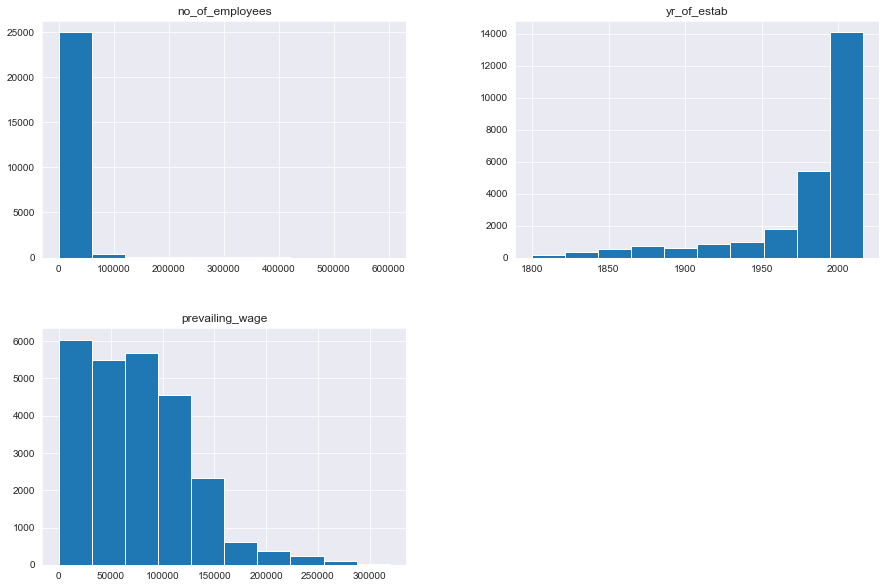

<IPython.core.display.Javascript object>

In [15]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 10))
plt.show()

Majority of the employers have no_of_employees in their company within 90000; there are however some ranging as high as 600K.
We have data majorily from 1980's and above in the dataset.
Prevailing wage is ranging from as low as ~0 till as high as 280K. Majority of the data being under 150K however.

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

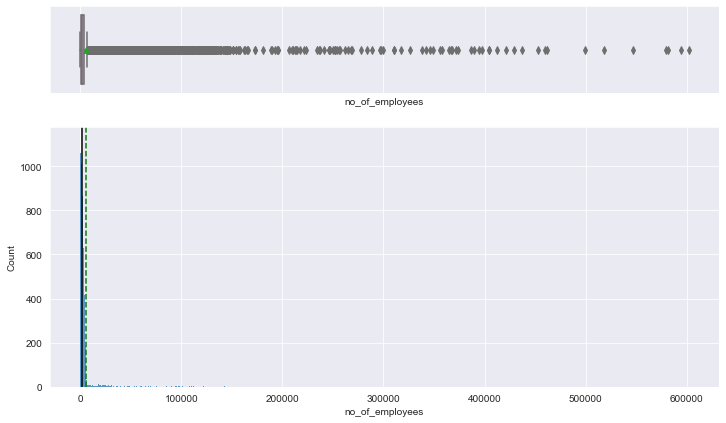

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "no_of_employees")

Number of employess has some negative values which needs to be treated and as large as 600K.

In [18]:
df.loc[df["no_of_employees"] < 0].shape

(33, 11)

<IPython.core.display.Javascript object>

There are 33 records where no_of_employees has negative values; we could probably consider those as typos and take absolute of that.

In [19]:
df["no_of_employees"] = abs(df["no_of_employees"])

<IPython.core.display.Javascript object>

In [20]:
df.loc[df["no_of_employees"] < 0].shape

(0, 11)

<IPython.core.display.Javascript object>

There are no more negative values in the attribute.

In [21]:
# log transformation of no_of_employees attribute
df["no_of_employees_log"] = np.log(df["no_of_employees"])

<IPython.core.display.Javascript object>

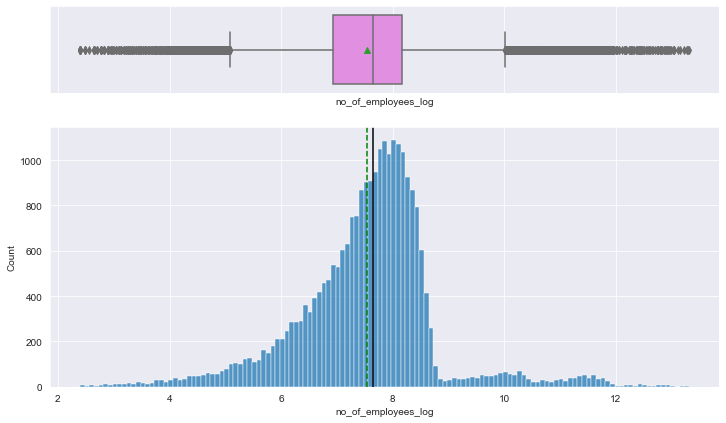

<IPython.core.display.Javascript object>

In [22]:
# Plotting log transformation of no_of_employees
histogram_boxplot(df, "no_of_employees_log")

There is some skweness still towards both the sides; but the curve is better in symmetry with log transformation than the original.

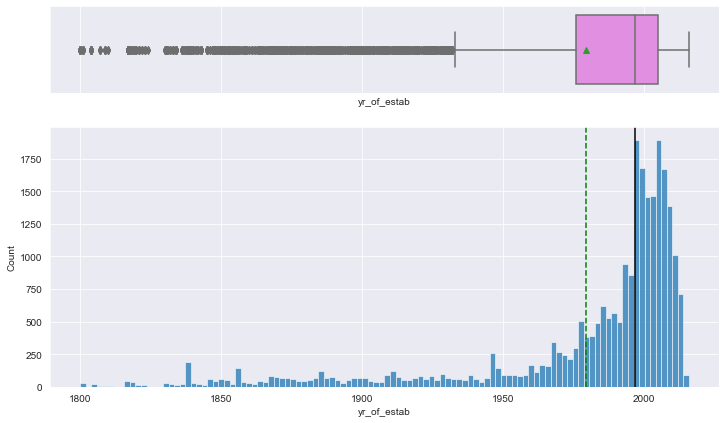

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "yr_of_estab")

Majority of the employees in our input, belongs to employers who are established in 1950-2016. There is lot of skewness in data, towards left. 

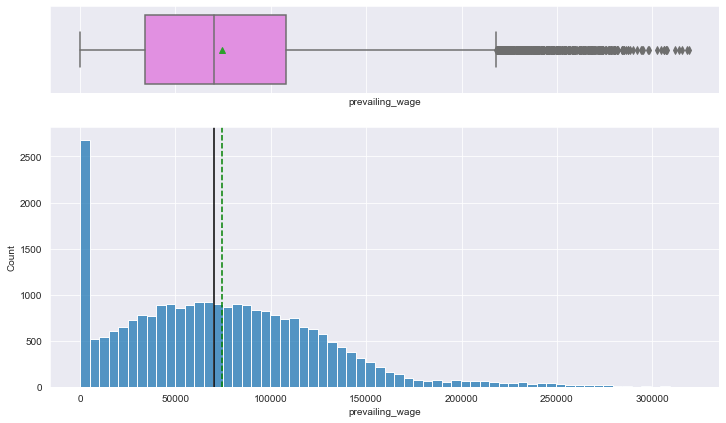

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "prevailing_wage")

prevailing_wage has very low values below 100, which might need further check and some right skewed data which is till 319K.

In [25]:
# Calculating number of rows where prevailing wage is less than 100
df[df["prevailing_wage"] < 100].shape

(176, 12)

<IPython.core.display.Javascript object>

In [26]:
df.loc[df["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

There are 176 rows where prevailing wage is less than 100 and all these have unit of wage as Hourly; still this doesnt seem valid to me as there are well educated employees for a similar role. In real world example, this would be better checked with Business.

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

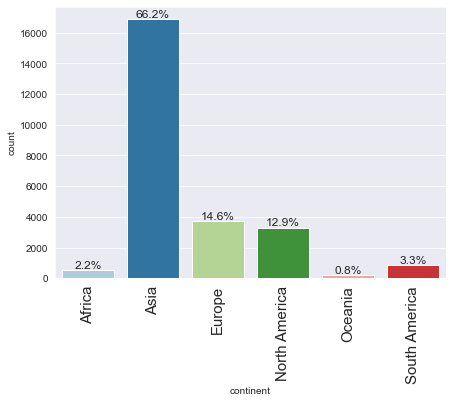

<IPython.core.display.Javascript object>

In [28]:
# labeled barplot on 'continent'
labeled_barplot(df, "continent", perc=True)

We have data for 6 different continents, Asia being the top most with 66% followed by Europe with 14.6% and least being Oceania.

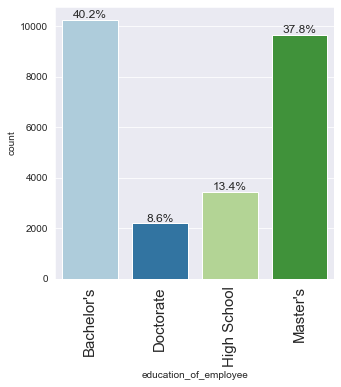

<IPython.core.display.Javascript object>

In [29]:
# labeled barplot on 'education of employee'
labeled_barplot(df, "education_of_employee", perc=True)

Majority of the employees in our dataset has education qualification as 'Bachelors' with 40%, followed by Master's with 38%. The least being Doctorate with 8%.

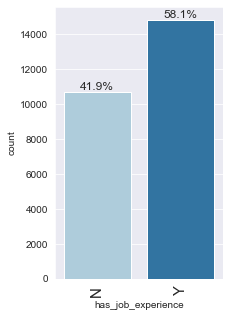

<IPython.core.display.Javascript object>

In [30]:
# labeled barplot on 'has job experience'
labeled_barplot(df, "has_job_experience", perc=True)

58% of the employees have prior job experience whereas 42% dont have experience.

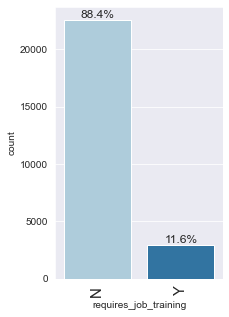

<IPython.core.display.Javascript object>

In [31]:
# labeled barplot on 'requires job training'
labeled_barplot(df, "requires_job_training", perc=True)

88% of employees don't require job training, whereas 12% of employees require job training. 

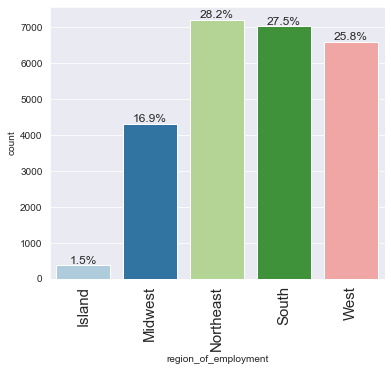

<IPython.core.display.Javascript object>

In [32]:
# labeled barplot on 'region of employment'
labeled_barplot(df, "region_of_employment", perc=True)

Majority of the employees intended to choose Northeast region as region of employmnet, with 28%, followed very closely by South with 27% and followed by West region with 26%. The least chosen region is Island with 1.5%.

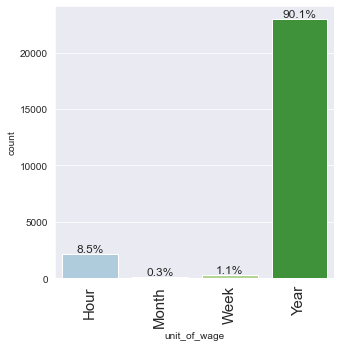

<IPython.core.display.Javascript object>

In [33]:
# labeled barplot on 'unit of wage'
labeled_barplot(df, "unit_of_wage", perc=True)

Majority of the records in our dataset has Year as the most ocurring unit of wage with 90%. Very minimum number of records has 'Month' as unit_of_wage with 0.3%. So we have yearly wage values for most of the records, in our prevailing_wage column.

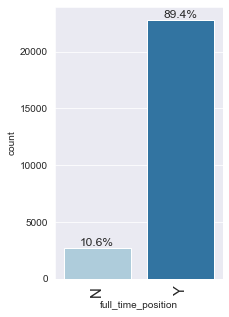

<IPython.core.display.Javascript object>

In [34]:
# labeled barplot on 'full time position'
labeled_barplot(df, "full_time_position", perc=True)

Almost 90% of the positions in applications are for Full time positions.

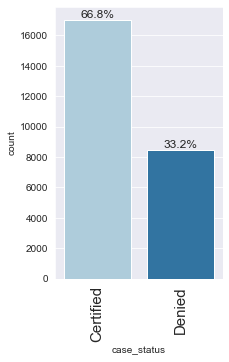

<IPython.core.display.Javascript object>

In [35]:
# labeled barplot on 'case status'
labeled_barplot(df, "case_status", perc=True)

Close to 67% of the employees visa case is Certified, rest 33% got denied. 

In [36]:
df["case_status"].dtype

dtype('O')

<IPython.core.display.Javascript object>

In [37]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [38]:
df["case_status"].dtype

dtype('int64')

<IPython.core.display.Javascript object>

In [39]:
df["case_status"].value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

Our target variable case_status has 17018 Certified and 8462 Denied visa application cases.

## Bivariate Analysis

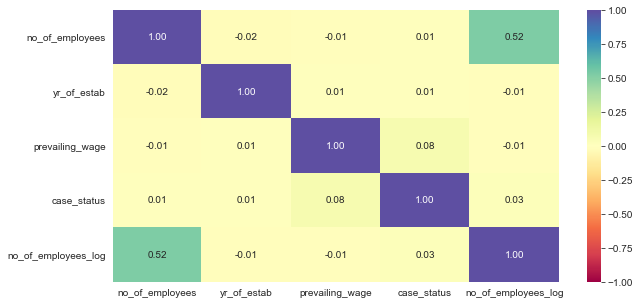

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

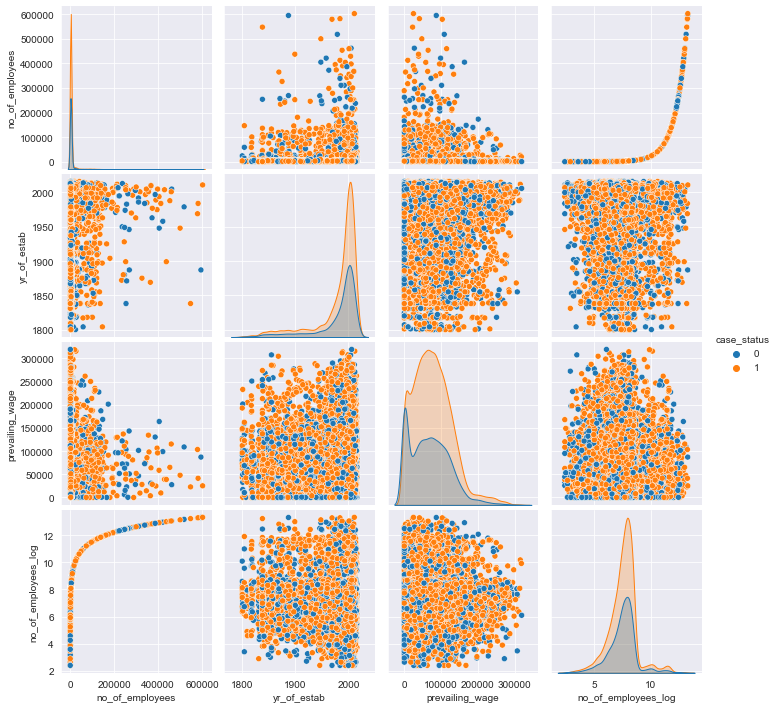

<IPython.core.display.Javascript object>

In [41]:
sns.pairplot(data=df, hue="case_status")

There doesnt seem like any particular trend of case_status being impacted due to these attributes; will need further analysis.

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

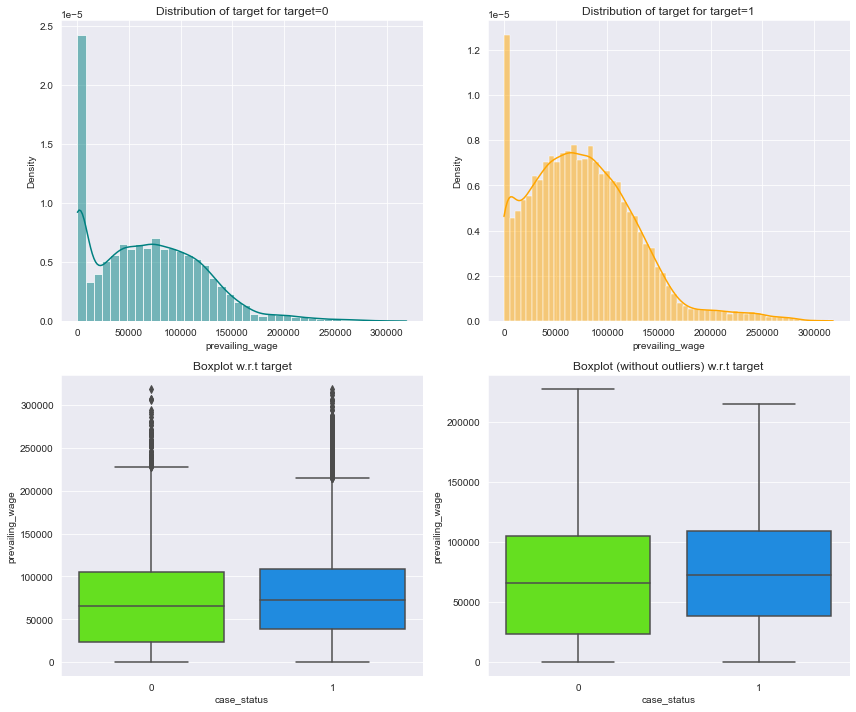

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

From the boxplot, after removing outliers; the median of prevailing_wage for Certified applications is more than the Denied ones. Denied status, has a wider range however.However, there are multiple units of wage, so prevailing wage cant be directly considered for finding a relation to case_status.

In [44]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


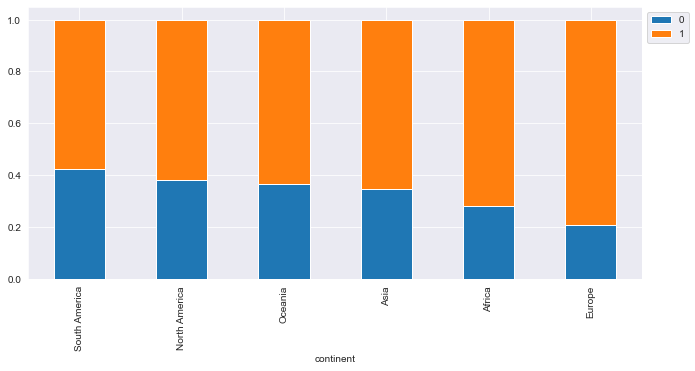

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(df, "continent", "case_status")

Europe has the majority of the employees whose visa case status got Certified. South America is the continent where major percentage of the visa cases got Denied.

In [46]:
df["education_of_employee"].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

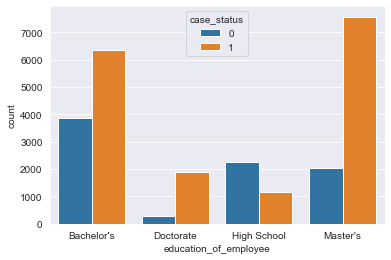

<IPython.core.display.Javascript object>

In [47]:
sns.countplot(data=df, x="education_of_employee", hue="case_status")

In [48]:
df.groupby(df["education_of_employee"])["case_status"].value_counts()

education_of_employee  case_status
Bachelor's             1              6367
                       0              3867
Doctorate              1              1912
                       0               280
High School            0              2256
                       1              1164
Master's               1              7575
                       0              2059
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


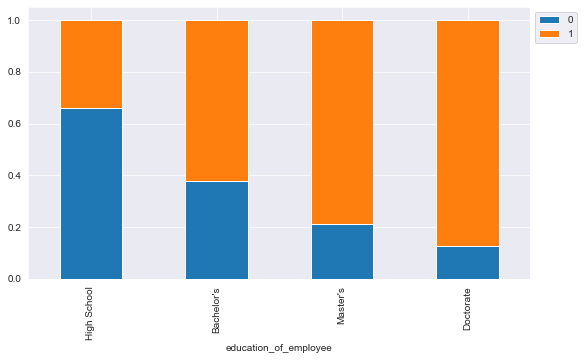

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(df, "education_of_employee", "case_status")

Employees with High School as education has got most percentage of applications Denied. Employees with 'Doctorate' as education has the highest percentage of application status as Certified. So highly qualified are getting more approvals.

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


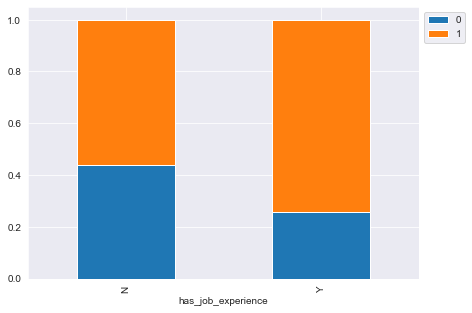

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(df, "has_job_experience", "case_status")

Majority of the employees with no job experience has got their visa case status to get Denied. So prior experience does look to have an impact on Visa approval status.

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
N                      7513  15012  22525
Y                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


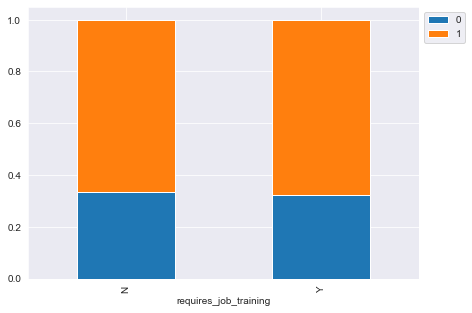

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(df, "requires_job_training", "case_status")

Training requirement doesnt really show any difference in percentage of employees' visa getting Certified or Denied.

<AxesSubplot:xlabel='region_of_employment', ylabel='prevailing_wage'>

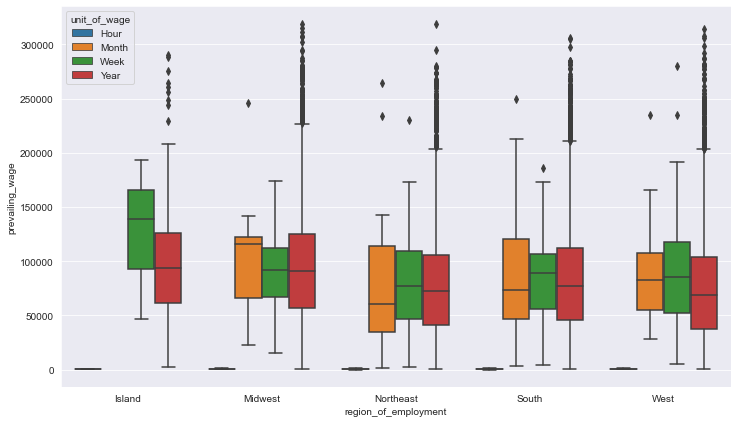

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage", hue="unit_of_wage")

Midwest and Island Region has more prevailing wages for 'Yearly' unit of wage.
There are outliers however.

In [53]:
df.groupby(["unit_of_wage", "case_status"])["prevailing_wage"].mean()

unit_of_wage  case_status
Hour          0                409.085998
              1                424.922811
Month         0              88167.630882
              1              87237.553636
Week          0              85003.102233
              1              85974.767160
Year          0              82345.844294
              1              80746.407044
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

The mean values of prevailing wage at wage unit level are calculated above. For MOnth Hour and Week there doesnt seem to be a great difference in Mean values for Case Certified or denied. Yearly however have more mean value for Denied compared to Certified.

<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

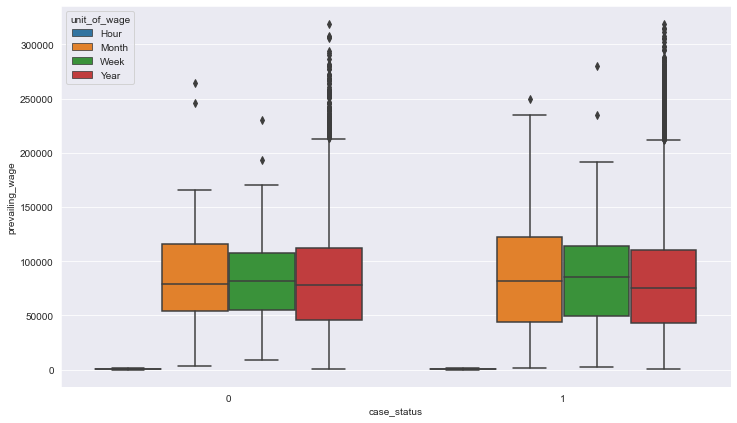

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x="case_status", y="prevailing_wage", hue="unit_of_wage")

In [55]:
# A new feature is derived based on the new_price of the devices; tagging them as Low, Medium and High
df["no_of_employees_range"] = pd.cut(
    x=df.no_of_employees,
    bins=[-np.infty, 1000, 10000, 100000, np.infty],
    labels=["Level1", "Level2", "Level3", "Level4"],
)

df["no_of_employees_range"].value_counts()

Level2    17803
Level1     6241
Level3     1165
Level4      271
Name: no_of_employees_range, dtype: int64

<IPython.core.display.Javascript object>

case_status               0      1    All
no_of_employees_range                    
All                    8462  17018  25480
Level2                 5876  11927  17803
Level1                 2133   4108   6241
Level3                  372    793   1165
Level4                   81    190    271
------------------------------------------------------------------------------------------------------------------------


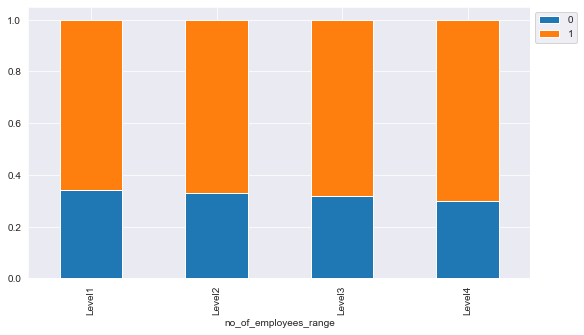

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(df, "no_of_employees_range", "case_status")

Range of no_of_employees has been created binning into 4 different levels: <1000: Level1, 1000-10K: Level2, 10K-100K: Level3 and >100K : Level4. From the stacked bar plot, Level4 whcih is cases where the employer has >100K employees has less Denial compared to others. Level1 and Level2 are almost the same percentage of cases getting Denied. 

In [57]:
# A new feature is derived based on the new_price of the devices; tagging them as Low, Medium and High
df["yr_of_estab_bins"] = pd.cut(
    x=df.yr_of_estab,
    bins=[-np.infty, 1899, 1999, np.infty],
    labels=["1800's", "1900's", "2000's"],
)

df["yr_of_estab_bins"].value_counts()

1900's    12903
2000's    10469
1800's     2108
Name: yr_of_estab_bins, dtype: int64

<IPython.core.display.Javascript object>

case_status          0      1    All
yr_of_estab_bins                    
All               8462  17018  25480
1900's            4404   8499  12903
2000's            3352   7117  10469
1800's             706   1402   2108
------------------------------------------------------------------------------------------------------------------------


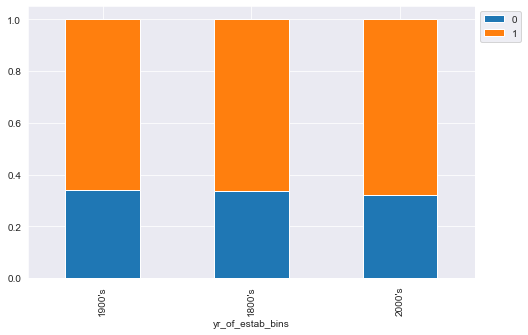

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "yr_of_estab_bins", "case_status")

Employers who have established in 2000 and later have got more applications Certified. Whereas those established in 1900 and 1800's are almost the same Denial rate.

<AxesSubplot:xlabel='unit_of_wage', ylabel='count'>

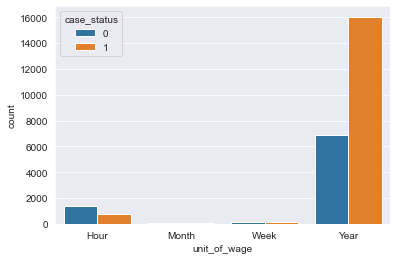

<IPython.core.display.Javascript object>

In [59]:
sns.countplot(data=df, x="unit_of_wage", hue="case_status")

Majority of the data points in our dataset have unit of wage as Year and many of cases also got Denied. 

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


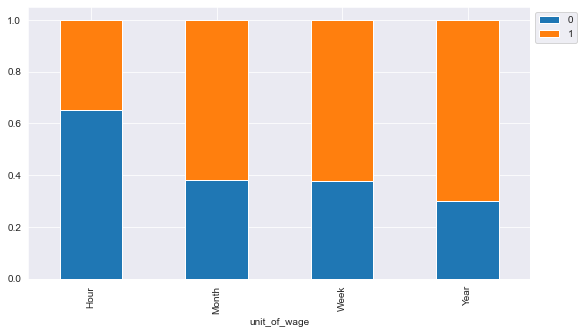

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(df, "unit_of_wage", "case_status")

Employees with wage unit as Year, has the majority of applications that got Certified. Whereas wage unit as Hour, majority of applications got Denied.

<AxesSubplot:xlabel='full_time_position', ylabel='count'>

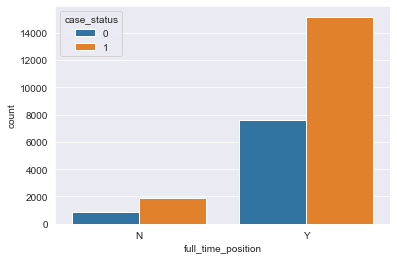

<IPython.core.display.Javascript object>

In [61]:
sns.countplot(data=df, x="full_time_position", hue="case_status")

Maority of the applications employees are on full time positions; and so is the number of cases getting Certified or Denied.

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
Y                   7610  15163  22773
N                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


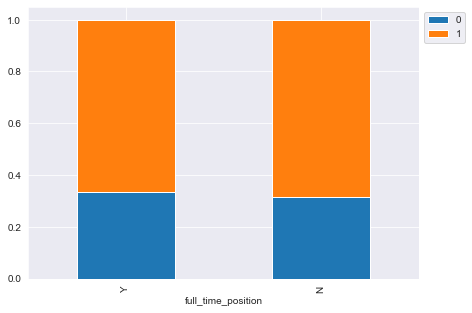

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(df, "full_time_position", "case_status")

The employees position is full time or not, does not really impact the percentage of cases getting Certified or Denied.

In [63]:
df_masters = df.loc[df["education_of_employee"] == "Master's"]

<IPython.core.display.Javascript object>

In [64]:
df_masters.shape

(9634, 14)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='prevailing_wage', ylabel='region_of_employment'>

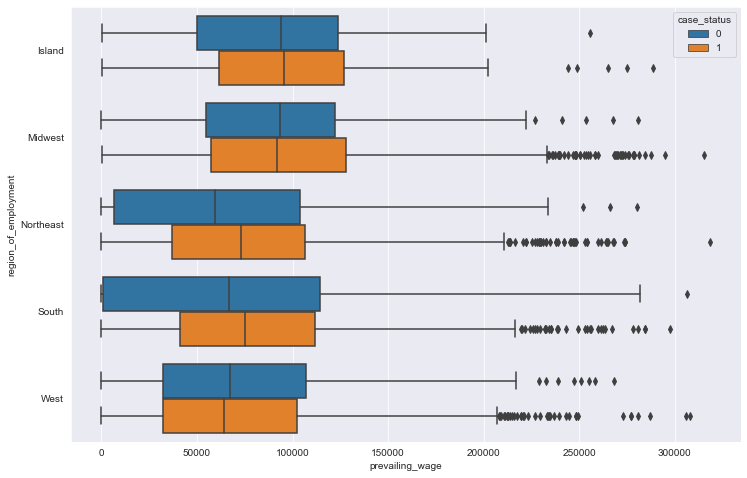

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_masters, x="prevailing_wage", y="region_of_employment", hue="case_status"
)

For the Northeast and South regions, there is very clear difference of the prevailing wage for Master's degree; and the case getting accepted vs denied. So low prevailing wages did show an impact on the application getting denied. 

In [66]:
df_yearly_wage = df.loc[df["unit_of_wage"] == "Year"]

<IPython.core.display.Javascript object>

In [67]:
df_yearly_wage.shape

(22962, 14)

<IPython.core.display.Javascript object>

case_status              0      1    All
region_of_employment                    
All                   6915  16047  22962
West                  2143   3915   6058
Northeast             2041   4168   6209
South                 1645   4580   6225
Midwest                954   3162   4116
Island                 132    222    354
------------------------------------------------------------------------------------------------------------------------


<Figure size 864x576 with 0 Axes>

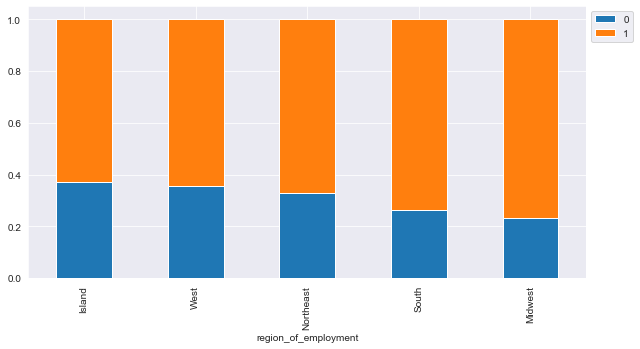

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(12, 8))
stacked_barplot(df_yearly_wage, "region_of_employment", "case_status")

For Yearly unit_wage cases, the Visa application got Certified majorly in Midwest and majority got Denied in Island region of employment.

<AxesSubplot:xlabel='prevailing_wage'>

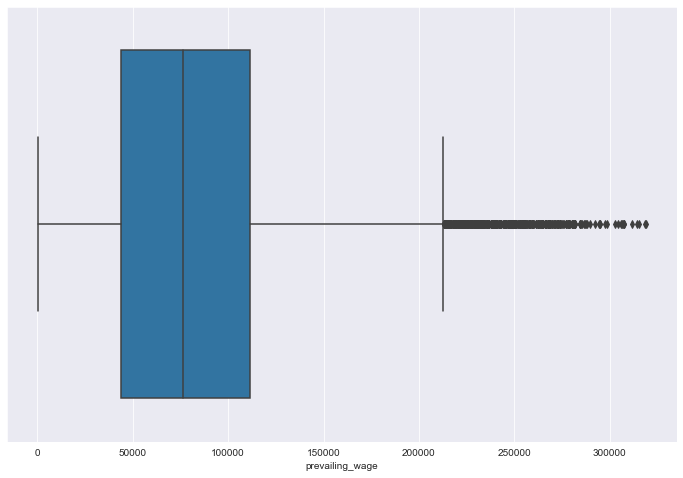

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_yearly_wage, x="prevailing_wage", hue="case_status")

**Observations from EDA:**

***Univariate analysis***

* no_of_employees: Number of employess has some negative values which needs to be treated and as large as 600K.
There are 33 records where no of employees has negative values which is not valid; so took absolute of that. And since there is lot of skewness in data, took a log transformation of the attribute and used in model.
* yr_of_estab: Majority of the employees in our input, belongs to employers who are established in 1950-2016. There is lot of skewness in data, towards left. 
* prevailing_wage: prevailing_wage has very low values below 100, which might need treatment and some right skewed data which is till 319K.
There are 176 rows where prevailing wage is less than 100 and all these have unit of wage as Hourly; still this doesnt seem valid to me as there are well educated employees for a similar role. In real world example, this would be better checked with Business.
* continent: We have data for 6 different continents, Asia being the top most with 66% followed by Europe with 14.6% and least being Oceania.
* education_of_employee: Majority of the employees in our dataset has education qualification as 'Bachelors' with 40%, followed by Master's with 38%. The least being Doctorate with 8%.
* has_job_experience: 58% of the employees have job experience whereas 42% dont have experience.
* requires_job_training: 88% of employees don't require job training, whereas 12% of employees require job training. 
* region_of_employment: Majority of the employees intended to choose Northeast region as region of employmnet, with 28%, followed very closely by South with 27% and followed by West region with 26%. The least chosen region is Island with 1.5%.
* unit_of_wage: Majority of the records in our dataset has Year as the most ocurring unit of wage with 90%. Very minimum number of records has 'Month' as unit_of_wage with 0.3%.
* full_time_position: Almost 90% of the positions in applications are for Full time positions.
* case_status: Close to 67% of the employees visa case is Certified, rest 33% got denied. 
Conversion has been done, all Certified to 1 and Denied to 0. Our dataset has 17018 Certified and 8462 Denied visa application cases.

***Bivariate Analysis***

* From the boxplot, after removing outliers; the median of prevailing_wage for Certified applications is more than the Denied ones. Denied status, has a wider range however.However, there are multiple units of wage, so prevailing wage cant be directly considered for finding a relation to case_status.
* Europe has the majority of the employees whose visa case status got Certified. South America is the continent where major percentage of the visa cases got Denied.
* Employees with High School as education has got most percentage of applications Denied. Employees with 'Doctorate' as education has the highest percentage of application status as Certified. So highly qualified are getting more approvals.
* Majority of the employees with no job experience has got their visa case status to get Denied. So prior experience does look to have an impact on Visa approval status.
* Training requirement doesnt really show any difference in percentage of employees' visa getting Certified or Denied.
* Midwest and Island Region has more prevailing wages. Average value of prevailing wage is less for Northeast and West. There are outliers however.
The mean values of prevailing wage at wage unit level are calculated and for MOnth Hour and Week there doesnt seem to be a great difference in Mean values for Case Certified or denied. Yearly however have more mean value for Denied compared to Certified.
* Range of no_of_employees has been created binning into 4 different levels: <1000: Level1, 1000-10K: Level2, 10K-100K: Level3 and >100K : Level4. From the stacked bar plot, Level4 whcih is cases where the employer has >100K employees has less Denial compared to others. Level1 and Level2 are almost the same percentage of cases getting Denied. 
* Employers who have established in 2000 and later have got more applications Certified. Whereas those established in 1900 and 1800's are almost the same Denial rate.
* Employees with choice of employment region 'Midwest' has got majority applications Certified. Whereas 'Island' as employment region has the majority of visa applications 'Denied'.
* Employees with wage unit as Year, has the majority of applications that got Certified. Whereas wage unit as Hour, majority of applications got Denied.
* Maority of the applications employees are on full time positions; and so is the number of cases getting Certified or Denied. However the employees position is full time or not, does not really impact the percentage of cases getting Certified or Denied.
* For the Northeast and South regions, there is very clear difference of the prevailing wage for Master's degree; and the case getting accepted vs denied. So low prevailing wages did show an impact on the application getting denied. 
* For Yearly unit_wage cases, the Visa application got Certified majorly in Midwest and majority got Denied in Island region of employment.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [70]:
# Checking for any missing values in dataset
df.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
no_of_employees_log      0
no_of_employees_range    0
yr_of_estab_bins         0
dtype: int64

<IPython.core.display.Javascript object>

There is no missing values in the dataset.

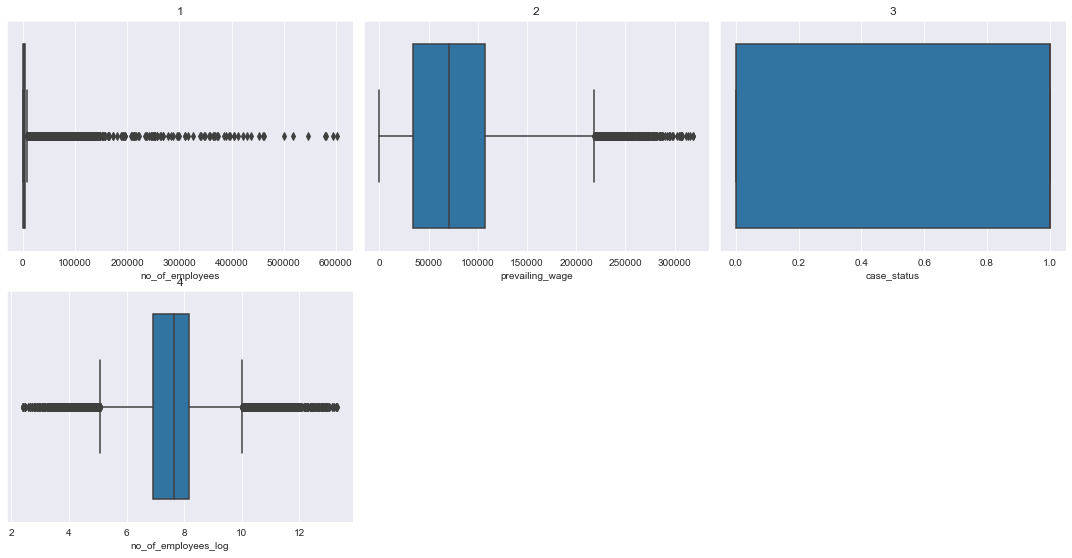

<IPython.core.display.Javascript object>

In [71]:
# Detecting outliers in the data using boxplot
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping yr_of_estab as it is a temporal variable
cols_list.remove("yr_of_estab")
plt.figure(figsize=(15, 45))

# for i, variable in enumerate(cols_list):
for i in range(len(cols_list)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(data=df, x=cols_list[i])  # , kde=True)
    #    cols_list.plot(kind='box',subplots=False, ax=axis)
    plt.tight_layout()
    plt.title(i + 1)
plt.show()

prevailing_wage is not of the same unit, there are some hourly wages, some daily, monthly and yearly. We cannot really consider these are outliers.
no_of_employees also has a range of values till 600K; but couldnt really treat them as outliers. That is the number of employees in that particular employer; we wont have much information (like EMployer details) to confirm the validity of this data; so retaining as is.

## EDA

- It is a good idea to explore the data once again after manipulating it.

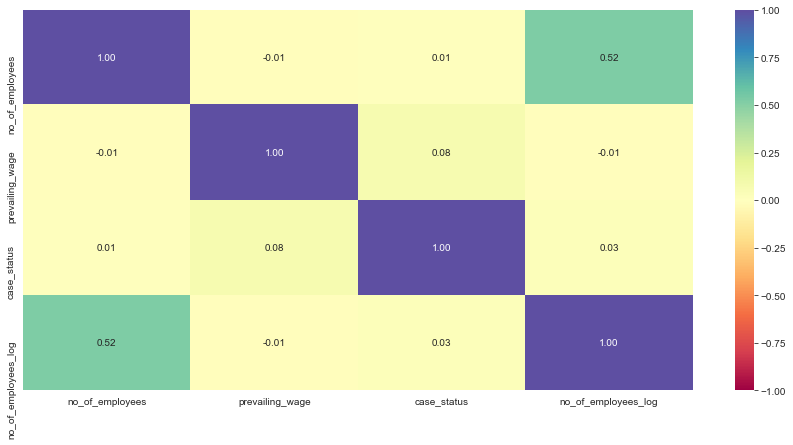

<IPython.core.display.Javascript object>

In [72]:
# Heatmap to display correlation on the attributes against each other
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("yr_of_estab")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

***Preparing data for the model building process***

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  int64   
 11  no_of_employees_log    25480 non-null  float64 
 12  no_of_employees_range  25480 non-null  category
 13  yr_of_estab_bins       25480 non-null  category
dtypes: category(9), float64(2), int64(3)
m

<IPython.core.display.Javascript object>

In [74]:
# Dropping no_of_employees feature whcih is transformed to log
df.drop(
    ["no_of_employees", "no_of_employees_range", "yr_of_estab_bins"],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   yr_of_estab            25480 non-null  int64   
 5   region_of_employment   25480 non-null  category
 6   prevailing_wage        25480 non-null  float64 
 7   unit_of_wage           25480 non-null  category
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  int64   
 10  no_of_employees_log    25480 non-null  float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 971.7 KB


<IPython.core.display.Javascript object>

In [76]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [77]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied an uneligible employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### Creating functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [78]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [79]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Model Building process

## Building a Decision tree

In [80]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)

<IPython.core.display.Javascript object>

In [81]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

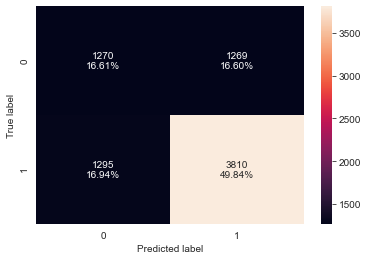

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix -**

* 49.8% True Positive (observed=1,predicted=1), visa application got Certified model predicted the same

* 16.6% False Positive (observed=0,predicted=1), model predicted application would get Certified but it should get Denied.

* 16.61% True Negative (observed=0,predicted=0), model predicted application would get Denied , reality also the same.

* 16.9% False Negative (observed=1,predicted=0), model predicted application would get Denied but they got Certified.

In [83]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [84]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.664574  0.746327   0.750148  0.748233


<IPython.core.display.Javascript object>

* Decision tree is working well on the training data with all metrics 1 since data gets overfitted. Testing set also has got a good 0.74 F1 score but thats highly variying from the training set so doesnt seem usable.

## Hyperparameter Tuning - Decision Tree

In [85]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [2, 7, 8, 10, 15, 20, 30, 40],
    "min_samples_leaf": [2, 5, 7, 10],
    "max_leaf_nodes": [3, 5, 10, 12, 15],
    "min_impurity_decrease": [0.0001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=12,
                       min_impurity_decrease=0.0001, min_samples_leaf=2,
                       random_state=1)

<IPython.core.display.Javascript object>

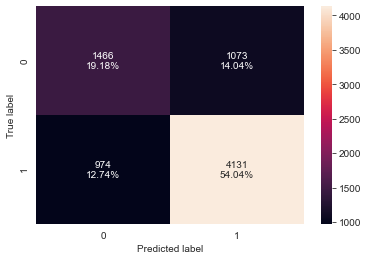

<IPython.core.display.Javascript object>

In [86]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [87]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.741029  0.812222   0.802455  0.807309


<IPython.core.display.Javascript object>

In [88]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.732208  0.809207   0.793812  0.801436


<IPython.core.display.Javascript object>

* Overfitting in decision tree has reduced; F1 score also looks good not too high variance between train and test sets.

In [89]:
dtree_estimator.get_depth()

7

<IPython.core.display.Javascript object>

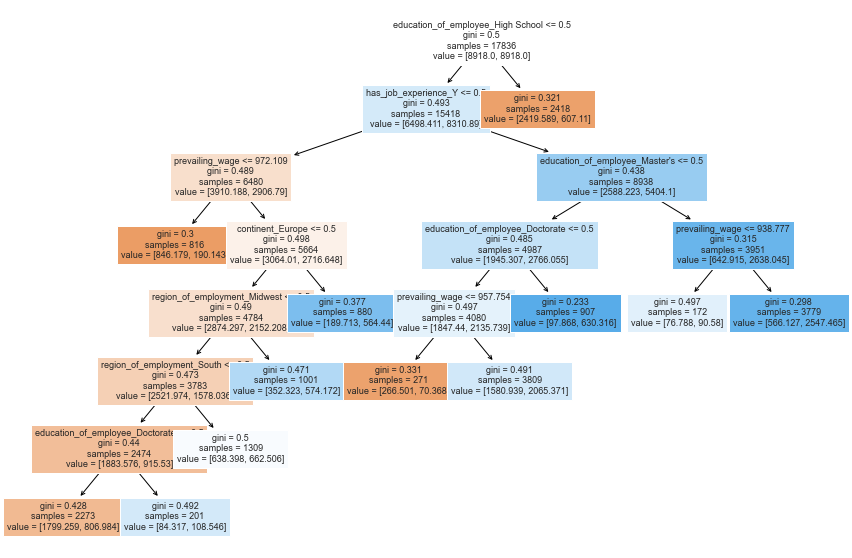

<IPython.core.display.Javascript object>

In [90]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    dtree_estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [91]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_estimator, feature_names=feature_names, show_weights=True))

|--- education_of_employee_High School <= 0.50
|   |--- has_job_experience_Y <= 0.50
|   |   |--- prevailing_wage <= 972.11
|   |   |   |--- weights: [846.18, 190.14] class: 0
|   |   |--- prevailing_wage >  972.11
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- region_of_employment_Midwest <= 0.50
|   |   |   |   |   |--- region_of_employment_South <= 0.50
|   |   |   |   |   |   |--- education_of_employee_Doctorate <= 0.50
|   |   |   |   |   |   |   |--- weights: [1799.26, 806.98] class: 0
|   |   |   |   |   |   |--- education_of_employee_Doctorate >  0.50
|   |   |   |   |   |   |   |--- weights: [84.32, 108.55] class: 1
|   |   |   |   |   |--- region_of_employment_South >  0.50
|   |   |   |   |   |   |--- weights: [638.40, 662.51] class: 1
|   |   |   |   |--- region_of_employment_Midwest >  0.50
|   |   |   |   |   |--- weights: [352.32, 574.17] class: 1
|   |   |   |--- continent_Europe >  0.50
|   |   |   |   |--- weights: [189.71, 564.44] class: 1
|   |--- ha

<IPython.core.display.Javascript object>

In [92]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.330842
has_job_experience_Y               0.232331
prevailing_wage                    0.125257
education_of_employee_Master's     0.092153
education_of_employee_Doctorate    0.079283
continent_Europe                   0.068096
region_of_employment_Midwest       0.042193
region_of_employment_South         0.029844
unit_of_wage_Year                  0.000000
unit_of_wage_Week                  0.000000
unit_of_wage_Month                 0.000000
region_of_employment_West          0.000000
region_of_employment_Northeast     0.000000
yr_of_estab                        0.000000
requires_job_training_Y            0.000000
continent_South America            0.000000
continent_Oceania                  0.000000
continent_North America            0.000000
continent_Asia                     0.000000
no_of_employees_log                0.000000
full_time_position_Y               0.000000


<IPython.core.display.Javascript object>

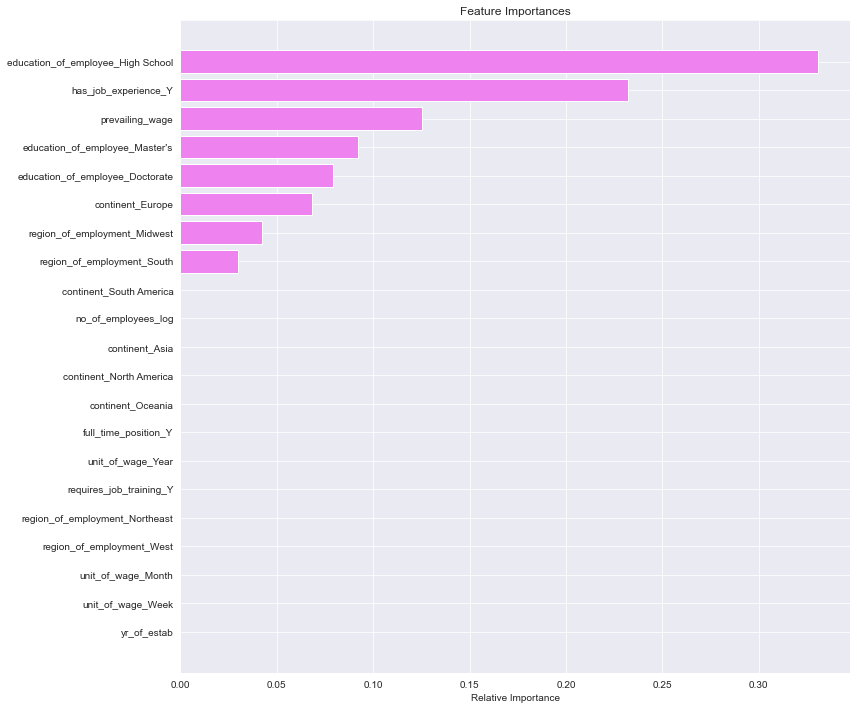

<IPython.core.display.Javascript object>

In [93]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education of employee, job experience and prevailing wage are the top 3 important features that could get the Visa application to get Certified. Because of the restriction on depth of the tree while tuning, only certain attributes are showed up as important features.

## Bagging Classifier

In [94]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

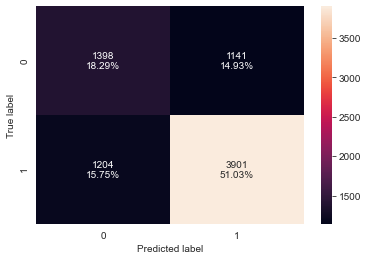

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [96]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985871  0.986989   0.991818  0.989398


<IPython.core.display.Javascript object>

In [97]:
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.693223  0.764153   0.773701  0.768897


<IPython.core.display.Javascript object>

* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of F1 score and all other metrics too.

### Hyperparameters on Bagging Classifier

In [98]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1, bootstrap=True)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [50, 90, 110, 130],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the estimator_tuned to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=90,
                  random_state=1)

<IPython.core.display.Javascript object>

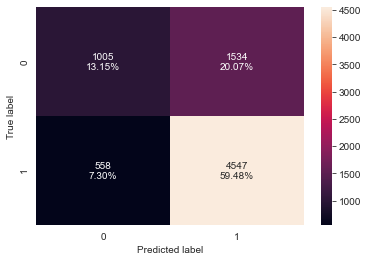

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [100]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance \n", bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.997982  0.999748   0.997237  0.998491


<IPython.core.display.Javascript object>

In [101]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance \n", bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.726321  0.890695   0.747739  0.812981


<IPython.core.display.Javascript object>

Tuned Bagging classifier also overfitted the data, its too well f1 score on Train data and poor performance on Test data.

## Random Forest

In [102]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

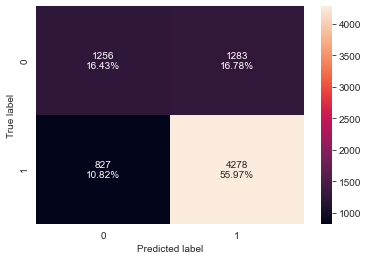

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [104]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

In [105]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.723967  0.838002   0.769286  0.802175


<IPython.core.display.Javascript object>

* Random Forest has poverfitted on training data, but it is not able to generalize well on the test data in terms of F1 score.

### Tuning Random Forest

In [106]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1, bootstrap=True)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [30, 70, 100],
    "max_depth": list(np.arange(5, 15, 5)),
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       n_estimators=70, random_state=1)

<IPython.core.display.Javascript object>

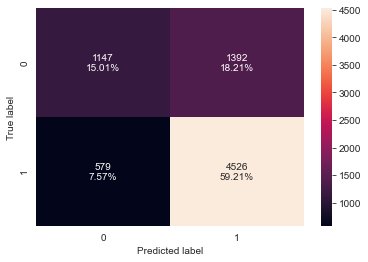

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [108]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.765586  0.902963   0.780511  0.837284


<IPython.core.display.Javascript object>

In [109]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742151  0.886582   0.764785  0.821192


<IPython.core.display.Javascript object>

Tuned Random forest has got a good F1 score on train and test sets with very less difference. The model looks good to be considered.

In [110]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
education_of_employee_High School  0.237218
prevailing_wage                    0.150893
has_job_experience_Y               0.122588
education_of_employee_Master's     0.111091
no_of_employees_log                0.054753
education_of_employee_Doctorate    0.054579
yr_of_estab                        0.047559
unit_of_wage_Year                  0.047414
continent_Europe                   0.041295
region_of_employment_Midwest       0.022118
region_of_employment_West          0.017849
continent_Asia                     0.016961
region_of_employment_South         0.016294
continent_North America            0.015187
region_of_employment_Northeast     0.013428
full_time_position_Y               0.011066
requires_job_training_Y            0.008924
continent_South America            0.007001
continent_Oceania                  0.001868
unit_of_wage_Week                  0.001395
unit_of_wage_Month                 0.000520


<IPython.core.display.Javascript object>

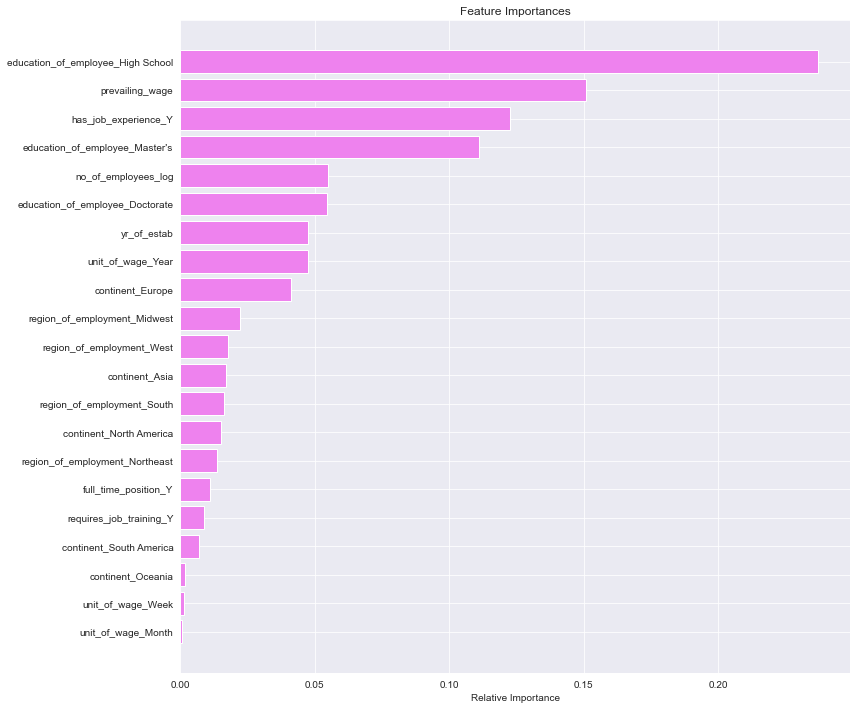

<IPython.core.display.Javascript object>

In [111]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Looks like education_of_employee (High School), prevailing_wage and job_experience (Y) are the most important featrures for the tuned Random Forest model as well.

## Adaptive Boosting (Ada Boosting) Technique

In [112]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

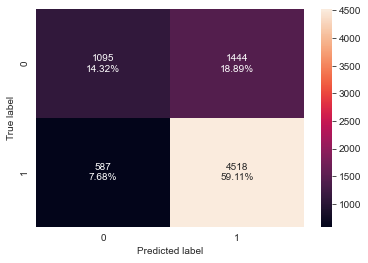

<IPython.core.display.Javascript object>

In [113]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [114]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


<IPython.core.display.Javascript object>

In [115]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance \n", ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


<IPython.core.display.Javascript object>

Adaptive Boosting Classifier did a good job on the F1 score, it didnt overfit the data. Train vs Test F1 score is really close. 

### Hyperparameter Tuning on Ada Boosting

In [116]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.05, 0.8, 1],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

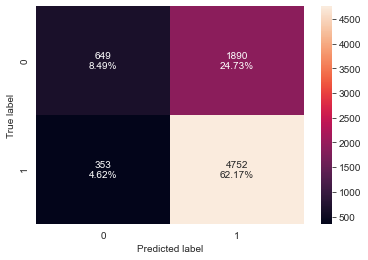

<IPython.core.display.Javascript object>

In [117]:
# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [118]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance \n", abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


<IPython.core.display.Javascript object>

In [119]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance \n", abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


<IPython.core.display.Javascript object>

After tuning the Ada Boost Classifier model, the F1 score has reduced comapread to default and Recall has increased. 

## Gradient Boosting

In [120]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

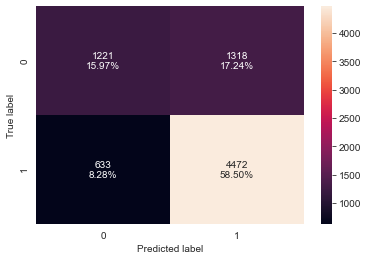

<IPython.core.display.Javascript object>

In [121]:
# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [122]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance \n", gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


<IPython.core.display.Javascript object>

In [123]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance \n", gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


<IPython.core.display.Javascript object>

Gradient Boosting Classifier did a good job in generalizing the train and test data, without much overfitting. 

### Gradient Boosting Hyperparameter Tuning

In [124]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

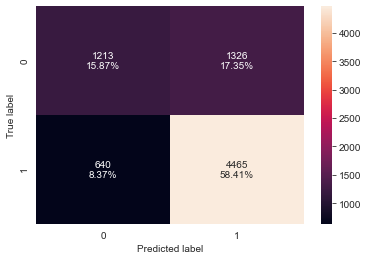

<IPython.core.display.Javascript object>

In [125]:
# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [126]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance \n", gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.758298  0.882733   0.783023  0.829894


<IPython.core.display.Javascript object>

In [127]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance \n", gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742805  0.874633   0.771024  0.819567


<IPython.core.display.Javascript object>

The tuned Gradient Boosting model also is performing well on train and test data, no overfitting. 

## XG Boosting

In [128]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

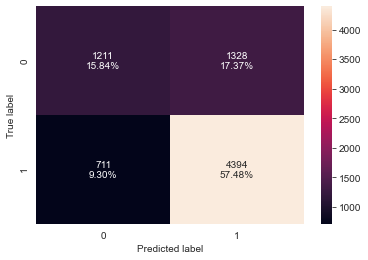

<IPython.core.display.Javascript object>

In [129]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [130]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance \n", xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


<IPython.core.display.Javascript object>

In [131]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance \n", xgb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


<IPython.core.display.Javascript object>

XG Boosting with default parameters has got a good F1 score, but there is slight overfitting of the train data. There is lot of difference in F1 score of train vs test data. 

### XG Boosting Hyperparameter tuning

In [132]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 50, 100, 200],
    "scale_pos_weight": [1, 2],
    "subsample": [0.7, 1],
    "learning_rate": [0.05, 0.1, 0.4],
    "colsample_bytree": [0.7, 0.9],
    "colsample_bylevel": [0.5, 0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

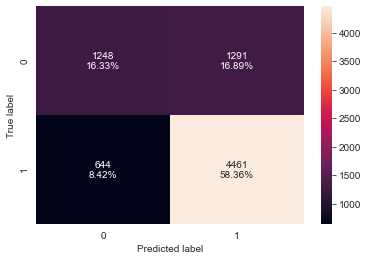

<IPython.core.display.Javascript object>

In [133]:
# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [134]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance \n", xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.761942  0.882985   0.786703  0.832068


<IPython.core.display.Javascript object>

In [135]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance \n", xgb_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.74686  0.873849   0.775556  0.821774


<IPython.core.display.Javascript object>

XGB Classifier tuned model has done a good job of predicting the F1 score on train and test data. 

## Stacking Classifier

In [136]:
estimators = [
    ("Random Forest", rf_estimator),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       min_samples_leaf=5,
                                                       n_estimators=70,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight='balance...
                                                 eval_metric='logloss', gamm

<IPython.core.display.Javascript object>

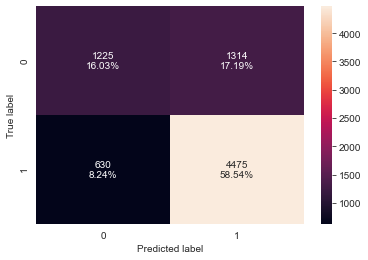

<IPython.core.display.Javascript object>

In [137]:
# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [138]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance \n", stacking_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.760709  0.883824   0.784985  0.831478


<IPython.core.display.Javascript object>

In [139]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance \n", stacking_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745683  0.876592   0.773018  0.821553


<IPython.core.display.Javascript object>

Stacking Classifier also has not overfitted the data much, the F1 score is really close for train and test data.

## Comparing Models

In [140]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.741029,1.0,0.765586,0.985871,0.997982,0.738226,0.712548,0.758802,0.758298,0.838753,0.761942,0.760709
Recall,1.0,0.812222,1.0,0.902963,0.986989,0.999748,0.887182,0.931923,0.883740,0.882733,0.931419,0.882985,0.883824
Precision,1.0,0.802455,1.0,0.780511,0.991818,0.997237,0.760688,0.720067,0.783042,0.783023,0.843482,0.786703,0.784985
F1,1.0,0.807309,1.0,0.837284,0.989398,0.998491,0.819080,0.812411,0.830349,0.829894,0.885272,0.832068,0.831478


<IPython.core.display.Javascript object>

In [141]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664574,0.732208,0.723967,0.742151,0.693223,0.726321,0.734301,0.706567,0.744767,0.742805,0.733255,0.746860,0.745683
Recall,0.746327,0.809207,0.838002,0.886582,0.764153,0.890695,0.885015,0.930852,0.876004,0.874633,0.860725,0.873849,0.876592
Precision,0.750148,0.793812,0.769286,0.764785,0.773701,0.747739,0.757799,0.715447,0.772366,0.771024,0.767913,0.775556,0.773018
F1,0.748233,0.801436,0.802175,0.821192,0.768897,0.812981,0.816481,0.809058,0.820927,0.819567,0.811675,0.821774,0.821553


<IPython.core.display.Javascript object>

The highest F1 score among all these models is with XGBoost Classifier Tuned model. There is not much difference between train and test metrics too; so the model is able to generalize the data and not overfitting.

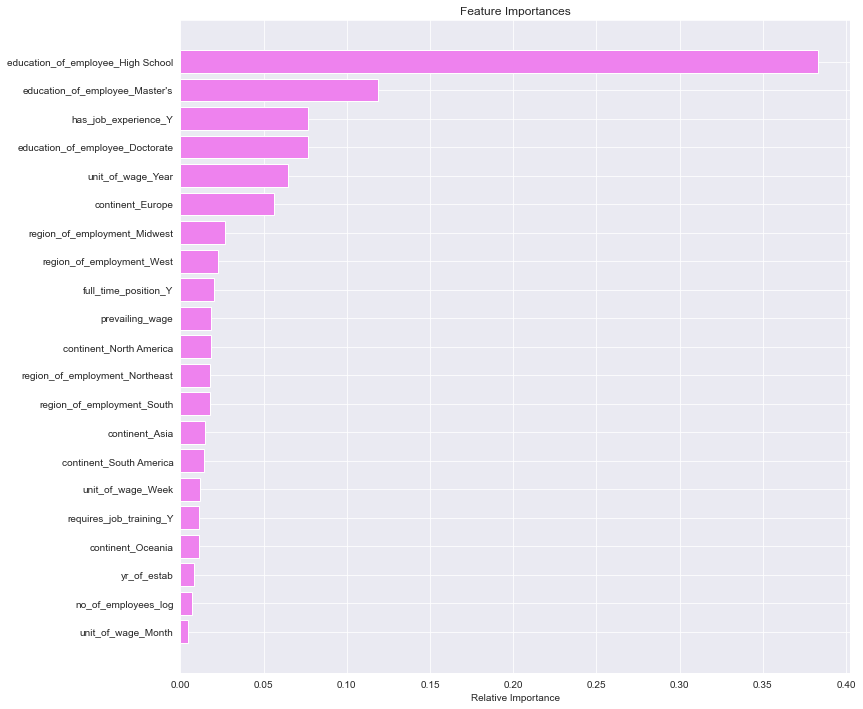

<IPython.core.display.Javascript object>

In [142]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education of employee, employees' job experience and prevailing wage turned out to be the important features. Also applications from European employees looks to be most ones getting Certified.

## Insights and Recommendations

The XG Boost tuned model turned out to be the best of all and EasyVisa can use this for predicting if the Visa applications would get Certified or Denied.

* Education of the employees has turned out to be the best factor for predcition. Employees with High School as education has got most percentage of applications Denied. Employees with 'Doctorate' as education has the highest percentage of application status as Certified. So highly qualified are getting more approvals.
* Job experience of the employees to be the second most important feature. Majority of the employees with no job experience has got their visa case status to get Denied. So prior experience does look to have an impact on Visa approval status.
* Europe has the majority of the employees whose visa case status got Certified. South America is the continent where major percentage of the visa cases got Denied.
* Employees with choice of employment region 'Midwest' has got majority applications Certified. Whereas 'Island' as employment region has the majority of visa applications 'Denied'.
* Prevailing wage is an important feature, if the employers submit applications without determining the correct prevailing wage; the case might be getting denied. 
* Employees with wage unit as Year, has the majority of applications that got Certified. Whereas wage unit as Hour, majority of applications got Denied.
* For Yearly unit_wage cases, the Visa application got Certified majorly in Midwest and majority got Denied in Island region of employment.
* More the number of employees in the organization of the employer, the chance of Visa applications getting Certified is more. 

Employers would need to take these below mentioned factors while filing a Visa application, for maximum success rate:
 * Employees' education qualification
 * Employees' job experience
 * Correct Prevailing wage rate, to be obtained and posted by Employer